In [ ]:
#SANIKA KULKARNI 
#OASIS INFOBYTE DATA SCIENCE INTERNSHIP TASK 1
#IRIS FLOWER CLASSIFICATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Loading dataset 
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**DATA PRE-PROCESSING**

In [ ]:
#REMOVING UNWANTED COLUMNS
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#SEARCHING FOR NULL VALUES
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
#COUNTING OCCURANCE OF SPECIES
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**PLOTS**

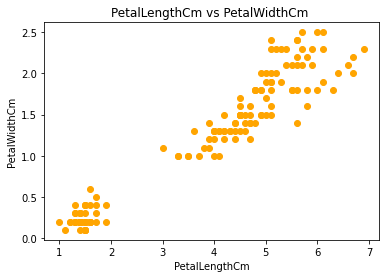

In [ ]:
#SCATTER PLOT
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],color='orange')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('PetalLengthCm vs PetalWidthCm ')
plt.show()

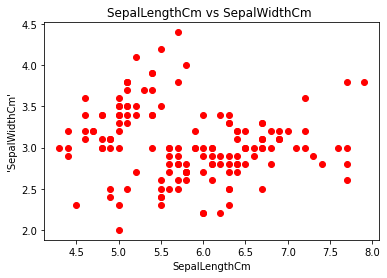

In [ ]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],color='red')
plt.xlabel('SepalLengthCm')
plt.ylabel("'SepalWidthCm'")
plt.title('SepalLengthCm vs SepalWidthCm ')
plt.show()


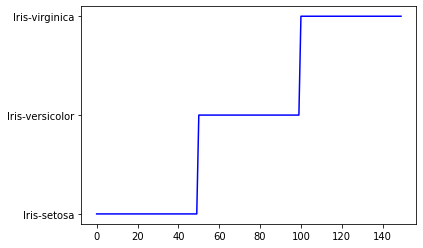

In [ ]:
plt.plot(df['Species'],c='blue')
plt.show()

**Data Modelling**-
Performing Train test Split

In [ ]:
X=df.drop('Species', axis=1)
Y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
102,7.1,3.0,5.9,2.1
15,5.7,4.4,1.5,0.4
56,6.3,3.3,4.7,1.6
122,7.7,2.8,6.7,2.0
73,6.1,2.8,4.7,1.2
...,...,...,...,...
83,6.0,2.7,5.1,1.6
9,4.9,3.1,1.5,0.1
28,5.2,3.4,1.4,0.2
81,5.5,2.4,3.7,1.0


In [ ]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
147,6.5,3.0,5.2,2.0
43,5.0,3.5,1.6,0.6
69,5.6,2.5,3.9,1.1
108,6.7,2.5,5.8,1.8
75,6.6,3.0,4.4,1.4
118,7.7,2.6,6.9,2.3
44,5.1,3.8,1.9,0.4
4,5.0,3.6,1.4,0.2
121,5.6,2.8,4.9,2.0


In [ ]:
Y_train

102     Iris-virginica
15         Iris-setosa
56     Iris-versicolor
122     Iris-virginica
73     Iris-versicolor
            ...       
83     Iris-versicolor
9          Iris-setosa
28         Iris-setosa
81     Iris-versicolor
68     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [ ]:
Y_test

10         Iris-setosa
147     Iris-virginica
43         Iris-setosa
69     Iris-versicolor
108     Iris-virginica
75     Iris-versicolor
118     Iris-virginica
44         Iris-setosa
4          Iris-setosa
121     Iris-virginica
149     Iris-virginica
22         Iris-setosa
79     Iris-versicolor
82     Iris-versicolor
1          Iris-setosa
146     Iris-virginica
96     Iris-versicolor
143     Iris-virginica
25         Iris-setosa
92     Iris-versicolor
115     Iris-virginica
23         Iris-setosa
11         Iris-setosa
12         Iris-setosa
40         Iris-setosa
133     Iris-virginica
27         Iris-setosa
53     Iris-versicolor
100     Iris-virginica
67     Iris-versicolor
Name: Species, dtype: object

In [ ]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict=model.predict(X_test)
y_predict

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

**Prediction of the species**

In [ ]:
values = np.array([[6.7, 3.1, 4.4, 1.4], [4.9, 3.5, 1.4, 0.4], [8.5, 2.5, 4.6, 4.9]])
prediction = model.predict(values)
print("Predicting Species: {}".format(prediction))

Predicting Species: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
